In [2]:
import os
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

!sudo apt-get install -y fonts-
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

'sudo'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.
'sudo'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.
'rm'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [3]:
path='E:/'
os.listdir(path)

['$RECYCLE.BIN',
 'Card-recommend-main',
 'fonts',
 'sepblock.csv',
 '블록_성별연령대별_201901.csv',
 '블록_성별연령대별_201901.txt',
 '블록_성별연령대별_2019011.csv',
 '블록_성별연령대별_201901111.csv',
 '블록_성별연령대별_201902.csv',
 '블록_성별연령대별_201903.txt',
 '블록_성별연령대별_201904.txt',
 '블록_성별연령대별_201905.txt',
 '블록_성별연령대별_201906.txt',
 '블록_성별연령대별_201907.txt',
 '블록_성별연령대별_201908.txt',
 '블록_성별연령대별_201909.txt',
 '블록_성별연령대별_201910.txt',
 '블록_성별연령대별_201911.txt',
 '블록_성별연령대별_201912.txt',
 '블록_성별연령대별_202001.txt',
 '블록_성별연령대별_202002.txt',
 '블록_성별연령대별_202003.txt',
 '블록_성별연령대별_202004.txt',
 '블록_성별연령대별_202005.txt',
 '블록_성별연령대별_202006.txt',
 '블록_성별연령대별_202007.txt',
 '블록_성별연령대별_202008.txt',
 '블록_성별연령대별_202009.txt',
 '블록_성별연령대별_202010.txt',
 '블록_성별연령대별_202011.txt',
 '블록_성별연령대별_202012.txt',
 '블록_시간대별소액결제건수_201901.txt',
 '블록_시간대별소액결제건수_201902.txt',
 '블록_시간대별소액결제건수_201903.txt',
 '블록_시간대별소액결제건수_201904.txt',
 '블록_시간대별소액결제건수_201905.txt',
 '블록_시간대별소액결제건수_201906.txt',
 '블록_시간대별소액결제건수_201907.txt',
 '블록_시간대별소액결제건수_201908.txt',
 '블록_시간대별소액결제건수_20190

In [4]:
UPJONG_Df=pd.read_csv(os.path.join(path, '블록_성별연령대별_201901111.csv'),encoding='utf-8', sep='|')


In [5]:
UPJONG_Df.rename(columns={'서울시민업종코드':'UPJONG_CD'},inplace=True)


In [6]:
sectorCodeDf=pd.read_csv(os.path.join(path, '서울시민 카드소비 업종코드.csv'), encoding='utf-8')
sectorCodeDf['UPJONG_CD'] = sectorCodeDf['UPJONG_CD'].str.upper()
sectorCodeDf.head()

,UPJONG_CD,CLASS1,CLASS2,CLASS3
0,SS001,요식/유흥,한식,한식
1,SS002,요식/유흥,일식/중식/양식,일식
2,SS003,요식/유흥,일식/중식/양식,양식
3,SS004,요식/유흥,일식/중식/양식,중식
4,SS005,요식/유흥,제과/커피/패스트푸드,제과점


In [7]:
UPJONG_Df=pd.merge(UPJONG_Df, sectorCodeDf, how='left', on='UPJONG_CD')
UPJONG_Df.head()
UPJONG_Df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10683783 entries, 0 to 10683782
Data columns (total 10 columns):
UPJONG_CD    object
기준년월         int64
고객주소블록코드     int64
성별           object
연령대별         object
카드이용금액계      int64
카드이용건수계      int64
CLASS1       object
CLASS2       object
CLASS3       object
dtypes: int64(4), object(6)
memory usage: 896.6+ MB


In [8]:
UPbig_Df=UPJONG_Df.pivot_table(index=['CLASS1'],values=['카드이용금액계','카드이용건수계'],aggfunc='sum')
UPbig_Df

,카드이용건수계,카드이용금액계
CLASS1,,
가전/가구,1548483,288124483029
가정생활/서비스,14935708,880177453042
교육/학원,2402004,251570022533
미용,4413289,174376560059
스포츠/문화/레저,11995083,335666302383
여행/교통,6609428,410895400465
요식/유흥,88740227,1741590874949
유통,101747043,1962114962404
음/식료품,9670107,242096094426


In [10]:
UPadd_Df=UPJONG_Df.pivot_table(index=['성별','연령대별','CLASS1'],values=['카드이용금액계','카드이용건수계'],aggfunc='sum')
UPadd_Df.to_csv('성별연령.csv')


In [86]:
UPadd2_Df=UPJONG_Df.pivot_table(index=['CLASS1','연령대별'],values=['카드이용금액계','카드이용건수계'],aggfunc='sum')
UPadd2_Df

UPadd2_Df.to_csv('업종연령.csv')

In [87]:
UPadd3_Df=UPJONG_Df.pivot_table(index=['CLASS1','연령대별','성별'],values=['카드이용금액계','카드이용건수계'],aggfunc='sum')
UPadd3_Df
UPadd3_Df.to_csv('업종연령성별.csv')

In [88]:
UPadd4_Df=UPJONG_Df.pivot_table(index=['연령대별'],values=['카드이용금액계','카드이용건수계'],aggfunc='sum')
UPadd4_Df
UPadd4_Df.to_csv('연령.csv')

In [89]:
UPadd5_Df=UPJONG_Df.pivot_table(index=['연령대별','CLASS1'],values=['카드이용금액계','카드이용건수계'],aggfunc='sum')
UPadd5_Df.to_csv('연령업종.csv')


In [79]:
# UPmid_Df=UPJONG_Df.pivot_table(index=['SB_L_UPJONG_NM(대분류_13분류)','SB_M_UPJONG_NM(중분류_30분류)'],values=['AMT_CORR(카드이용금액계)','USECT_CORR(카드이용건수)'],aggfunc='sum')
UPmid_Df=UPJONG_Df.pivot_table(index=['CLASS2'],values=['카드이용금액계','카드이용건수계'],aggfunc='sum')
UPmid_Df

,카드이용건수계,카드이용금액계
CLASS2,,
가전/가구,1548483,288124483029
각종요금,11552586,715087536713
교육용품,1631181,41208752182
교통,4662422,110063646368
기타요식,28396657,441925687905
기타유통,4769487,301889200564
기타의료,135656,45841970830
미용서비스,3090828,112517978292
백화점,5980986,422019436605


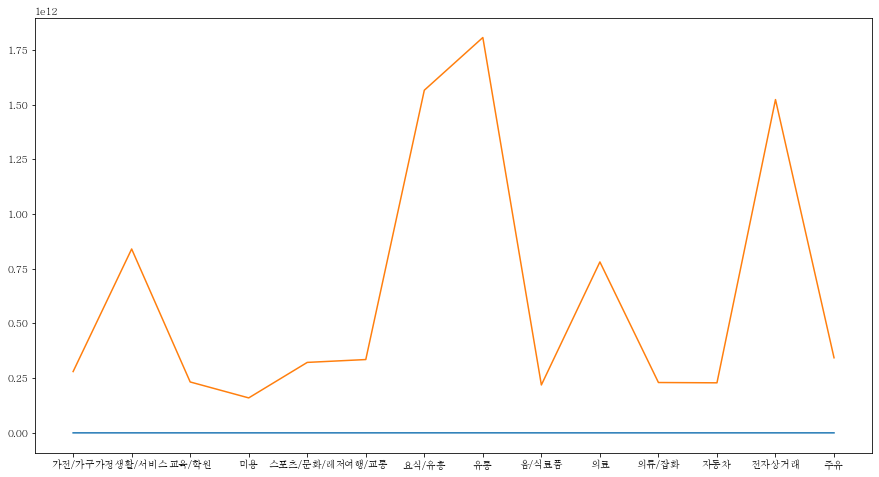

In [71]:
plt.rc('font', family='batang')
plt.figure(figsize=(15,8))
plt.plot(UPbig_Df)

# UPbig_Df.T.plot(axis=0)
# plt.rcParams["figure.figsize"] = (10,7)|
# plt.show()

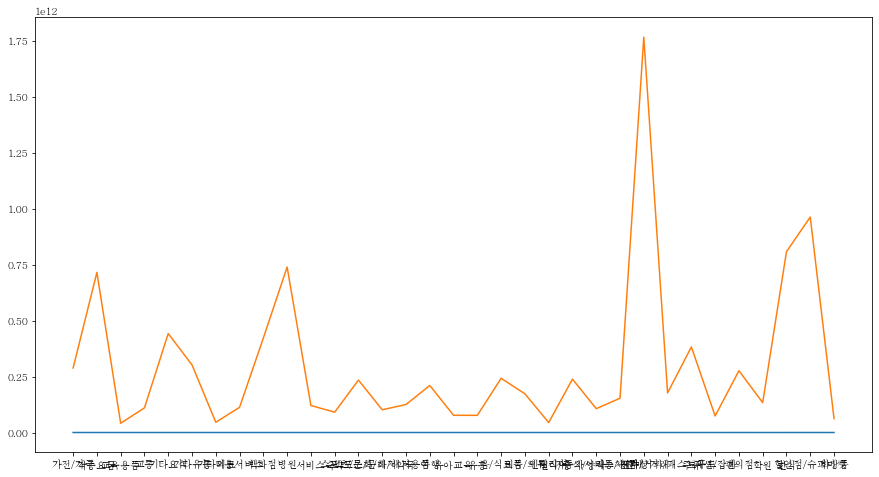

In [72]:
plt.figure(figsize=(15,8))
plt.plot(UPmid_Df)